<a href="https://colab.research.google.com/github/FaruqAlfa/PCVK-Pengolahan-Citra-Visi-Komputer-/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Jobsheet 11**

Nama: Mukhamad Faruq Al Fahmi

Kelas: 3D

NIM: 2141720066

Absen: 25

# **D. Latihan Praktikum**

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, buat notebook baru dan beri nama“Week11.ipynb”.
Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan
cara sebagai berikut.


## **Object Detection**
Metode yang digunakan

1. Template Matching
2. Edge Detection
3. Corner Detection
4. Grid Detection
5. Contour Detectio

In [70]:
#import library yang digunakan
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [71]:
#akses drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

## **Template Matching**

Menggunakan library openCV:

cv.matchTemplate(), dengan paraameter:

* image: citra input
* templ: template yang dicari, ukurannya tidak boleh lebih besar dari citra input
* method: metode dari template matching


Jenis metode template matching di openCV:
1. TM_SQDIFF
2. TM_SQDIFF_NORMED
3. TM_CCORR_NORMED
5. TM_CCOEFF
6. TM_CCOEFF_NORMED

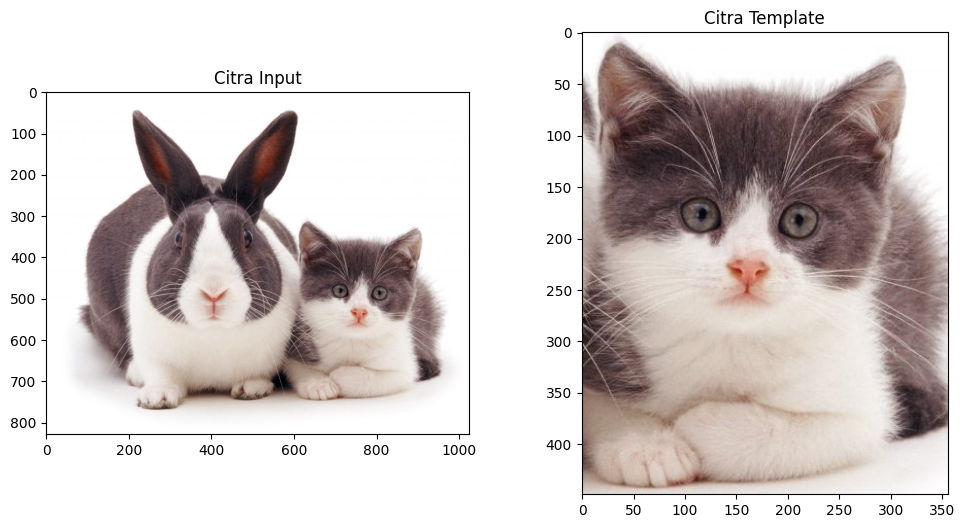

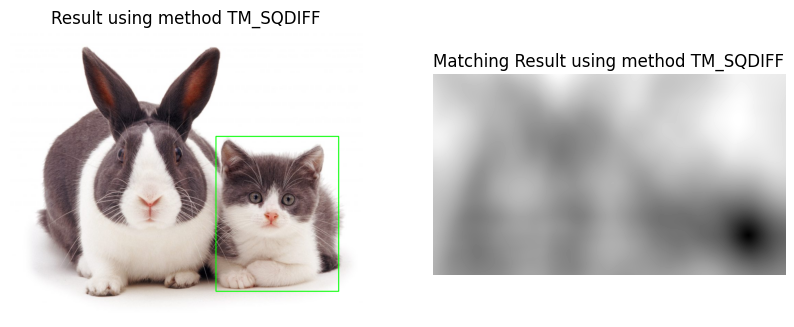

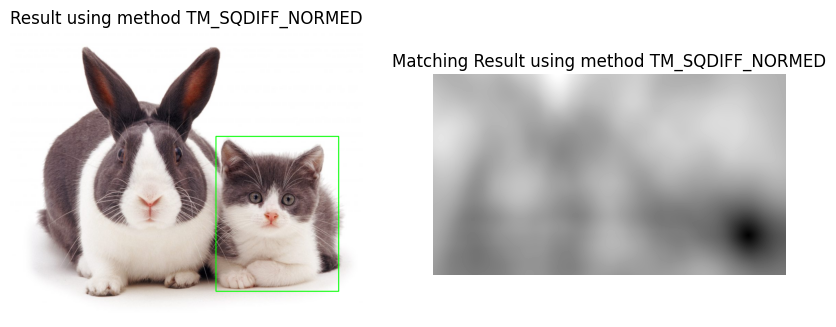

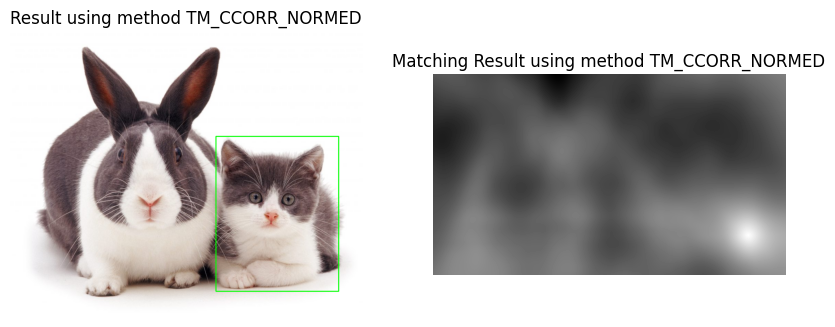

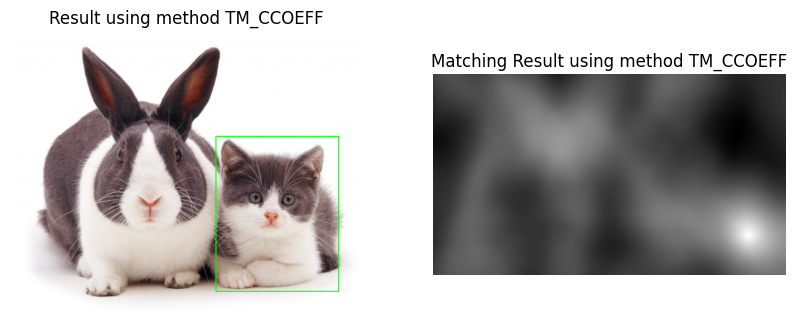

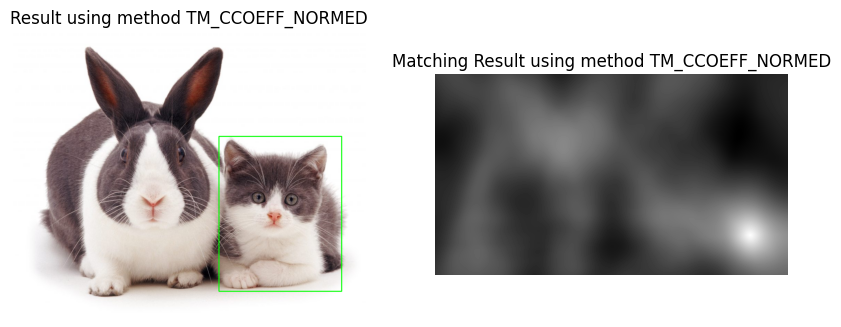

In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra input dan citra template
img = cv2.imread('/content/drive/MyDrive/Semester_5/Pengolahan_Citra_Visi_Komputer/Jobsheet_11/Object_Detection/cats_and_bunnies.jpg')
template = cv2.imread('/content/drive/MyDrive/Semester_5/Pengolahan_Citra_Visi_Komputer/Jobsheet_11/Object_Detection/cat2_templatejpg.jpg')

# Menampilkan citra input dan citra template
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].set_title('Citra Input')
axes[0].axis('on')

axes[1].imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
axes[1].set_title('Citra Template')
axes[1].axis('on')

plt.show()

# Metode template matching yang akan digunakan
methods = [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED, cv2.TM_CCORR_NORMED, cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED]
method_names = ["TM_SQDIFF", "TM_SQDIFF_NORMED", "TM_CCORR_NORMED", "TM_CCOEFF", "TM_CCOEFF_NORMED"]

# Loop melalui setiap metode dan lakukan template matching
for method, method_name in zip(methods, method_names):
    img_copy = img.copy()  # Buat salinan citra input untuk setiap metode

    # Lakukan template matching
    result = cv2.matchTemplate(img_copy, template, method)

    # Dapatkan posisi terbaik yang cocok dengan template
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    # Tentukan titik (koordinat) untuk gambar output tergantung pada metode
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    h, w = template.shape[:2]
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Gambar kotak di sekitar objek yang cocok dengan template pada citra input
    cv2.rectangle(img_copy, top_left, bottom_right, (0, 255, 0), 2)

    # Menampilkan citra input beserta hasil template matching menggunakan matplotlib di sebelah hasilnya
    plt.figure(figsize=(10, 5))


    # Tampilkan citra input
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
    plt.title('Result using method {}'.format(method_name))
    plt.axis('off')

    # Tampilkan hasil matching
    plt.subplot(1, 2, 2)
    plt.imshow(result, cmap='gray')
    plt.title('Matching Result using method {}'.format(method_name))
    plt.axis('off')

    plt.show()


3. Implementasikan konsep template matching tanpa menggunakan library OpenCV
untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan
bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai
berikut

In [73]:
from PIL import Image

# Load images
input_image = Image.open('/content/drive/MyDrive/Semester_5/Pengolahan_Citra_Visi_Komputer/Jobsheet_11/Object_Detection/bahrain.jpg')
template_image = Image.open('/content/drive/MyDrive/Semester_5/Pengolahan_Citra_Visi_Komputer/Jobsheet_11/Object_Detection/bahrain-template.jpg')

# Menampilkan citra input dan citra template
input_image.show()
template_image.show()


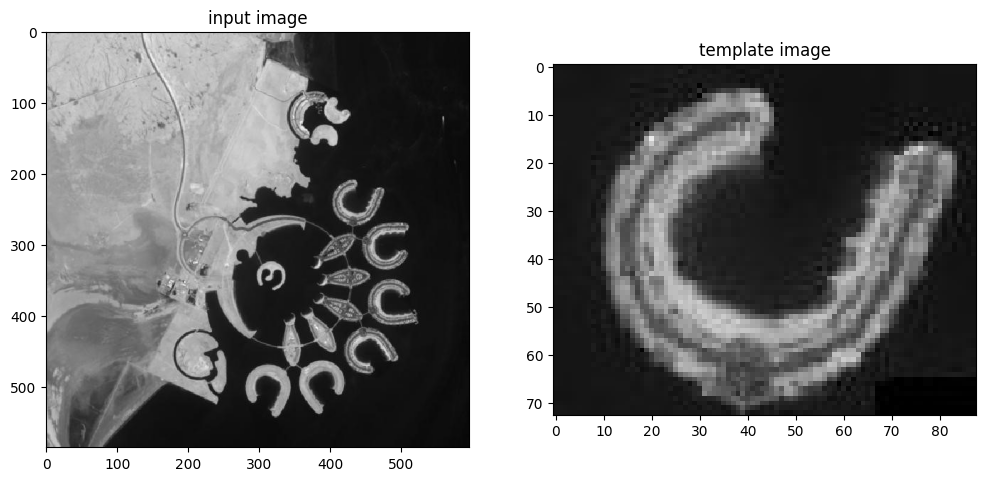

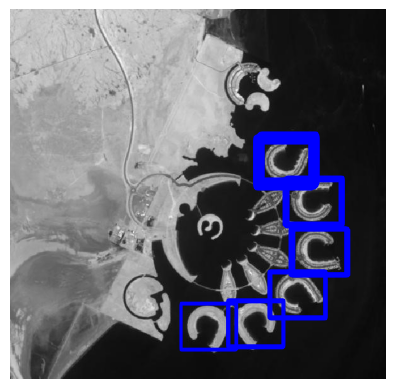

In [74]:
from skimage.feature import match_template

img = cv.imread('/content/drive/MyDrive/Semester_5/Pengolahan_Citra_Visi_Komputer/Jobsheet_11/Object_Detection/bahrain.jpg', 0)
template = cv.imread('/content/drive/MyDrive/Semester_5/Pengolahan_Citra_Visi_Komputer/Jobsheet_11/Object_Detection/bahrain-template.jpg', 0)

f, axarr = plt. subplots(1,2,figsize=(12,8))
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# Hitung kemiripan citra dengan citra template
result = match_template(img, template)

# Tentukan threshold untuk menentukan hasil match
threshold = 0.45
locations = np.where(result >= threshold)

# Plot hasil match
fig, ax = plt.subplots()
ax.imshow(img, cmap=plt.cm.gray)
ax.set_axis_off()
height, width = template.shape
for loc in zip(*locations[::-1]):
    rect = plt.Rectangle(loc, width, height, edgecolor='blue', facecolor='none', linewidth=1)
    ax.add_patch(rect)
plt.show()

4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian
Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga
menghasilkan luaran sebagai berikut:

In [75]:

img= cv.imread('/content/drive/MyDrive/Semester_5/Pengolahan_Citra_Visi_Komputer/Jobsheet_11/Object_Detection/car-park.jpg')

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

img_car = cv.cvtColor(img, cv.COLOR_BGR2RGB)


**a. Sobel Edge Detection**

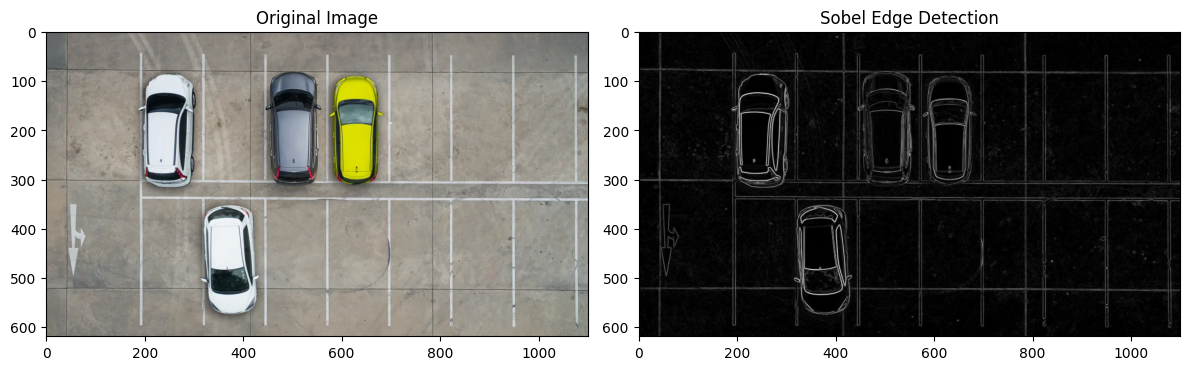

In [76]:
# Sobel Edge Detection
sobel_x = cv.Sobel(img_gray, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(img_gray, cv.CV_64F, 0, 1, ksize=3)
sobel_combined = cv.magnitude(sobel_x, sobel_y)

# Tampilkan gambar asli dan hasil deteksi tepi
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(img_car)
plt.title('Original Image')
plt.axis('on')

plt.subplot(2, 2, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('on')

plt.tight_layout()
plt.show()

**b. Canny Edge Detection**

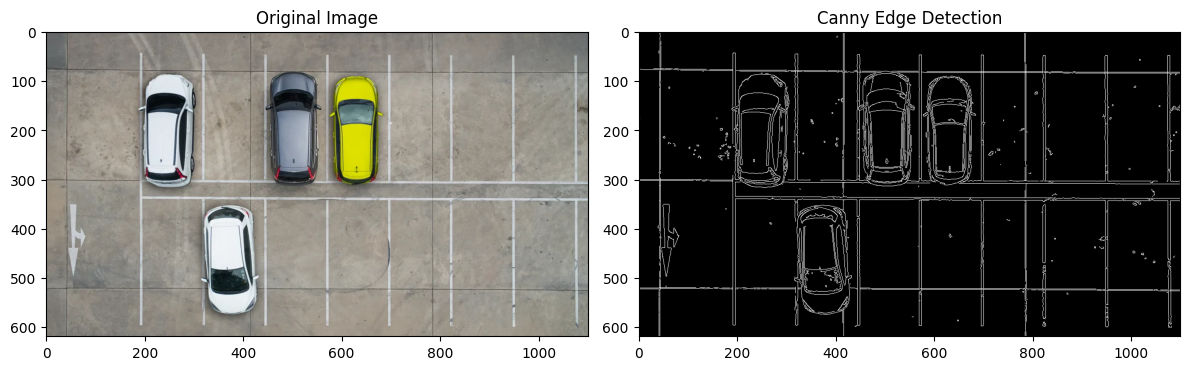

In [77]:
# Canny Edge Detection
canny = cv.Canny(img_gray, 100, 200)

# Tampilkan gambar asli dan hasil deteksi tepi
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(img_car)
plt.title('Original Image')
plt.axis('on')

plt.subplot(2, 2, 2)
plt.imshow(canny, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('on')

plt.tight_layout()
plt.show()

**c. Laplacian Edge Detection**

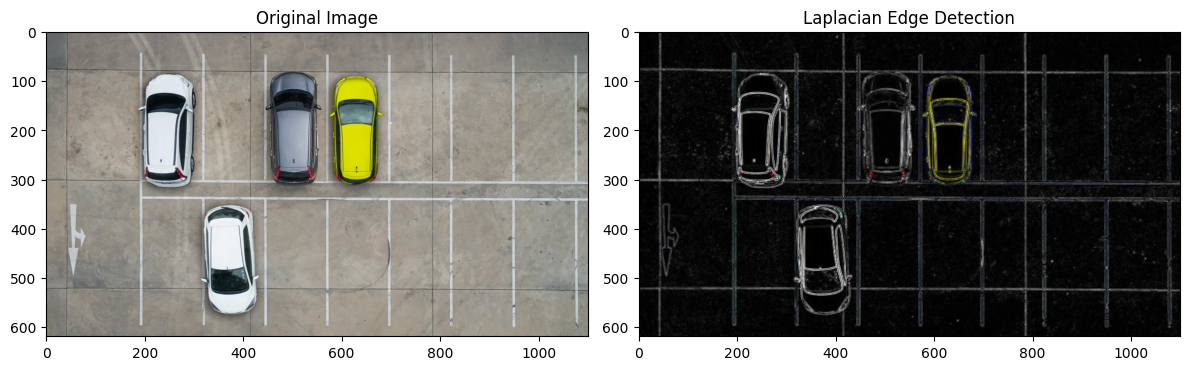

In [78]:
import cv2 as cv
import matplotlib.pyplot as plt

car_park = cv.imread('/content/drive/MyDrive/Semester_5/Pengolahan_Citra_Visi_Komputer/Jobsheet_11/Object_Detection/car-park.jpg')

# Reduce noise in image
img_car_noise = cv.GaussianBlur(car_park, (3, 3), 0)

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image = cv.Laplacian(img_car_noise, cv.CV_16S, ksize=3)

# Converting back to uint8
filtered_image = cv.convertScaleAbs(filtered_image)

# Tampilkan gambar asli dan hasil deteksi tepi
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(car_park, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(filtered_image, cv.COLOR_BGR2RGB))
plt.title('Laplacian Edge Detection')
plt.axis('on')

plt.tight_layout()
plt.show()


5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada
OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan
luaran sebagai berikut:

**a. Harris Corner Detection**

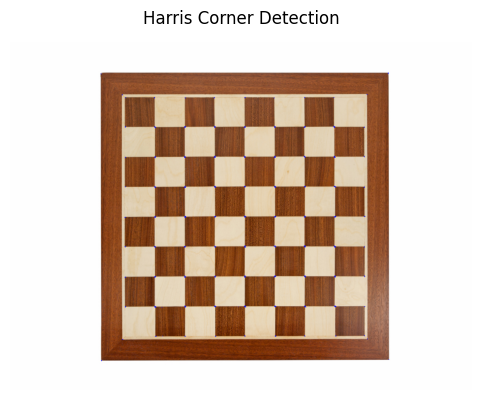

In [79]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar chess-board.jpg
img = cv2.imread('/content/drive/MyDrive/Semester_5/Pengolahan_Citra_Visi_Komputer/Jobsheet_11/Object_Detection/chess-board.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Metode Harris Corner Detection
harris_corners = cv2.cornerHarris(gray, 2, 3, 0.04)

# Tingkat kepekaan ambang batas
threshold = 0.01 * harris_corners.max()

# Gambar sudut yang ditemukan, menggunakan warna merah
img[harris_corners > threshold] = [255, 0, 0]

# Tampilkan hasil Harris Corner Detection
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()


**b. Shi-Tomasi Detection**

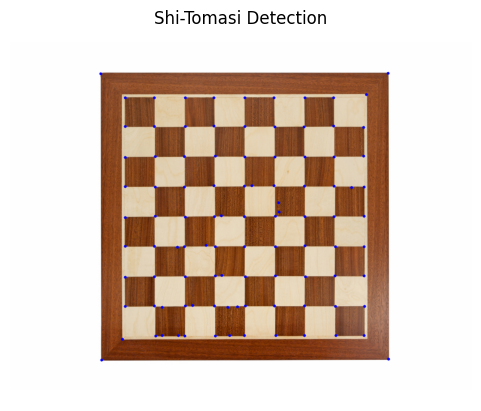

In [80]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar chess-board.jpg
img = cv2.imread('/content/drive/MyDrive/Semester_5/Pengolahan_Citra_Visi_Komputer/Jobsheet_11/Object_Detection/chess-board.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Metode Shi-Tomasi Detection
corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10)

# Konversi koordinat titik sudut ke bilangan bulat
corners = np.int0(corners)

# Gambar lingkaran pada setiap sudut yang ditemukan
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img, (x, y), 3, 255, -1)

# Tampilkan hasil Shi-Tomasi Detection
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Detection')
plt.axis('off')
plt.show()


6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan
teori, sehingga menghasilkan luaran sebagai berikut:


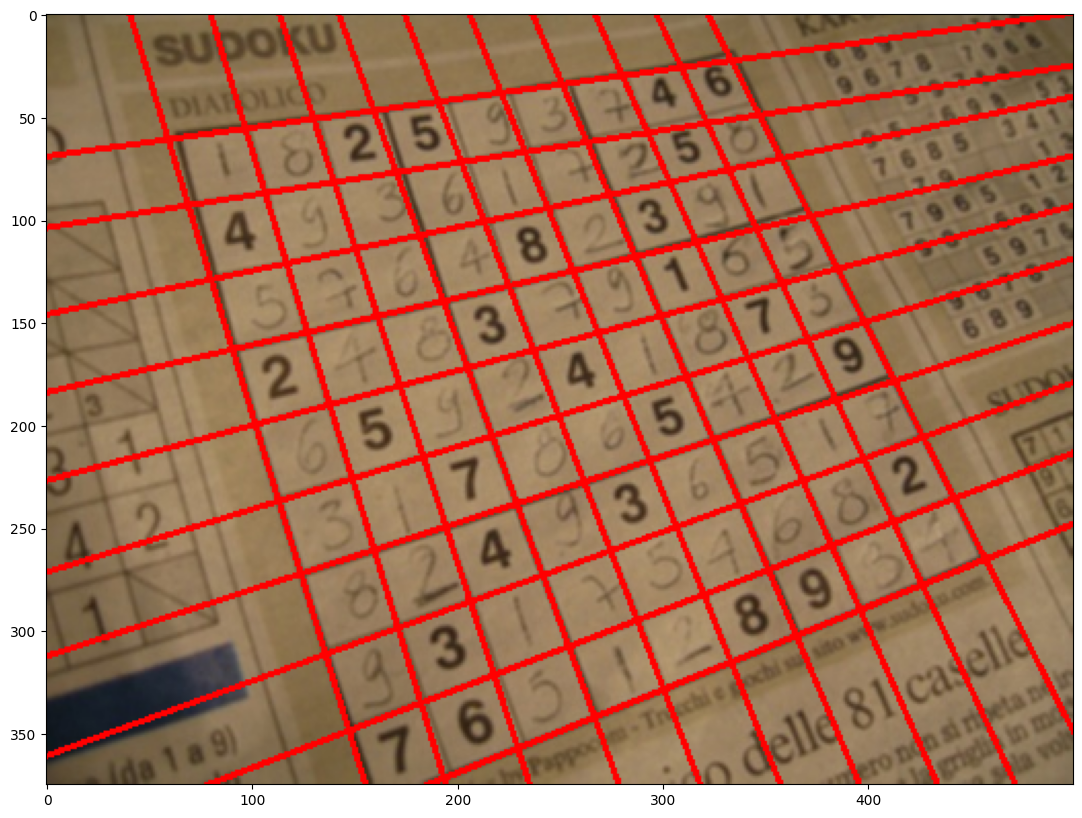

In [81]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar sudoku.jpg
img_s = cv.imread('/content/drive/MyDrive/Semester_5/Pengolahan_Citra_Visi_Komputer/Jobsheet_11/Object_Detection/sudoku.jpg')
img_gs = cv.cvtColor(img_s, cv.COLOR_BGR2GRAY)

edges = cv.Canny(img_gs, 90, 150, apertureSize=3)

kernel = np.ones((3, 3), np.uint8)
edges = cv.dilate(edges, kernel, iterations=1)

kernel = np.ones((5, 5), np.uint8)
edges = cv.erode(edges, kernel, iterations=1)

lines = cv.HoughLines(edges, 1, np.pi / 180, 150)

if lines is None or not lines.any():
    print('No lines were found')
    exit()

rho_threshold = 15
theta_threshold = 0.1

# Filter garis yang serupa
similar_lines = {i: [] for i in range(len(lines))}
for i in range(len(lines)):
    for j in range(len(lines)):
        if i == j:
            continue
        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

indices = [i for i in range(len(lines))]
indices.sort(key=lambda x: len(similar_lines[x]))

line_flags = len(lines) * [True]
for i in range(len(lines) - 1):
    if not line_flags[indices[i]]:
        continue
    for j in range(i + 1, len(lines)):
        if not line_flags[indices[j]]:
            continue
        rho_i, theta_i = lines[indices[i]][0]
        rho_j, theta_j = lines[indices[j]][0]
        if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
            line_flags[indices[j]] = False

filtered_lines = [lines[i] for i in range(len(lines)) if line_flags[i]]

for line in filtered_lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv.line(img_s, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Menampilkan gambar dengan garis yang terdeteksi
plt.figure(figsize=(20, 10))
plt.imshow(cv.cvtColor(img_s, cv.COLOR_BGR2RGB))
plt.axis('on')
plt.show()


7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan
menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:

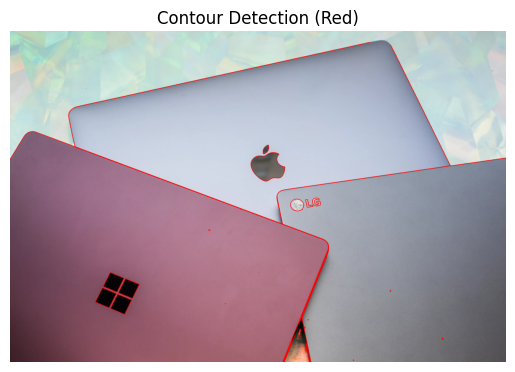

In [82]:
import cv2
import matplotlib.pyplot as plt

# Baca gambar laptop.jpg
img = cv2.imread('/content/drive/MyDrive/Semester_5/Pengolahan_Citra_Visi_Komputer/Jobsheet_11/Object_Detection/laptop.jpg')

# Konversi gambar ke citra skala abu-abu
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Deteksi tepi menggunakan Canny
edges = cv2.Canny(gray, 30, 200)

# Temukan kontur menggunakan findContours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Gambar kontur pada gambar asli (menggunakan warna merah)
cv2.drawContours(img, contours, -1, (0, 0, 255), 3)

# Tampilkan hasil deteksi kontur
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Contour Detection (Red)')
plt.axis('off')
plt.show()


## **Tugas Praktikum**


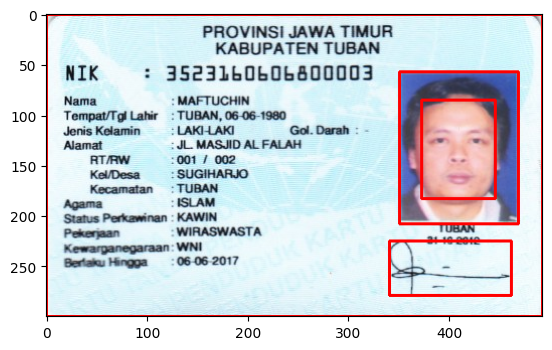

In [97]:
ktp = cv.imread("/content/drive/MyDrive/Semester_5/Pengolahan_Citra_Visi_Komputer/Jobsheet_11/Object_Detection/ktp3.png")

blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 30 and w >= 5 and float(ras) <= 2:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 20 and w >= 5 and float(ras) <= 3:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)


# cv.drawContours(ktp, contours, -1, (0, 255, 0), 2)

# Menampilkan gambar KTP dengan kontur menggunakan plt
ktp_rgb = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)
plt.imshow(ktp_rgb)
plt.show()